In [1]:
#!pip install graphviz

In [2]:
#!pip install dmba

# 0. Import Packages

In [3]:
import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score

In [5]:
from dmba import classificationSummary

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [37]:
from matplotlib.colors import LinearSegmentedColormap
from sklearn.neighbors import NearestNeighbors
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
from sklearn import tree

# 1. Data Exploration

In [28]:
df = pd.read_excel("ebayAuctions.xlsx", sheet_name = "eBay auctions")

In [8]:
df

,Category,Currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Fri,820.00,650.00,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [10]:
df["Competitive?"].value_counts()

1    1066
0     906
Name: Competitive?, dtype: int64

In [24]:
df.columns

Index(['Category', 'Currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?'],
      dtype='object')

array([[<AxesSubplot:title={'center':'sellerRating'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'ClosePrice'}>,
        <AxesSubplot:title={'center':'OpenPrice'}>],
       [<AxesSubplot:title={'center':'Competitive?'}>, <AxesSubplot:>]],
      dtype=object)

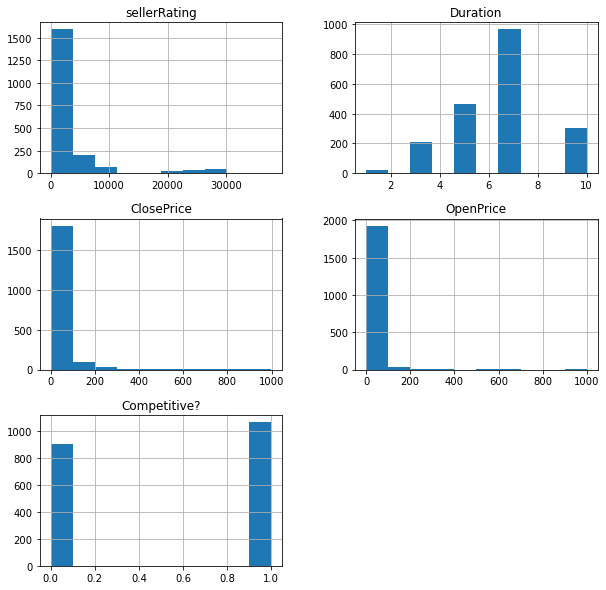

In [26]:
df[['Category', 'Currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?']].hist(sharex=False, sharey=False, xlabelsize=10, ylabelsize=10, figsize=(10,10))

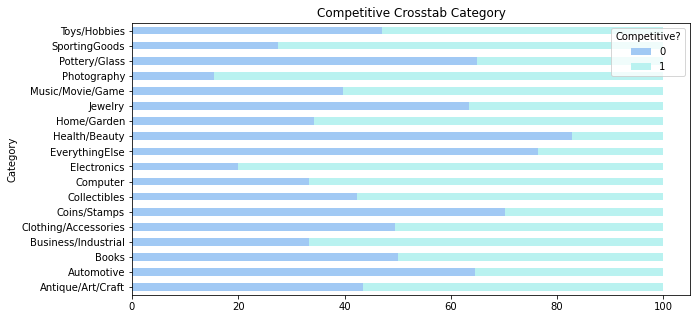

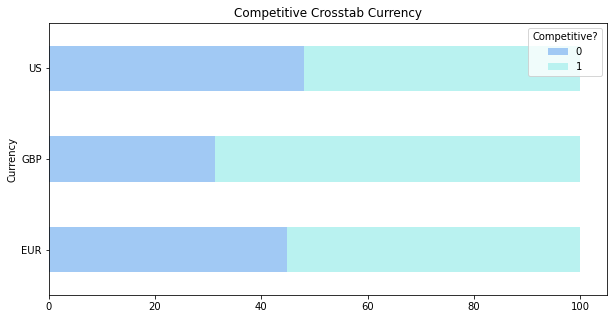

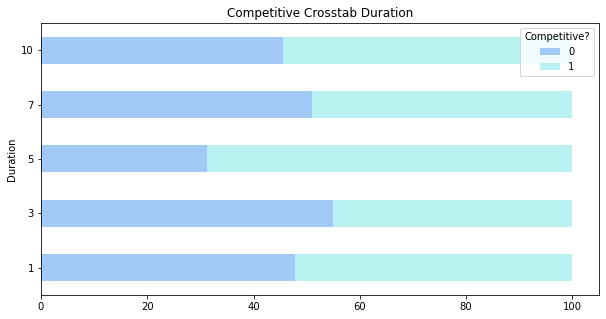

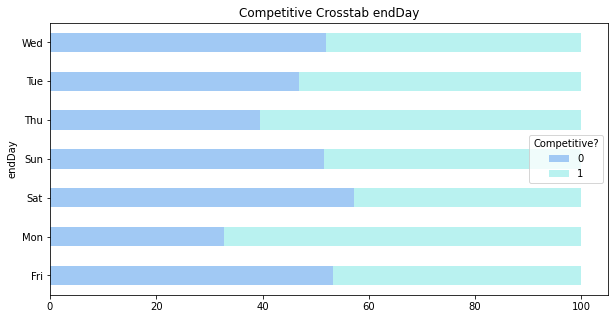

In [31]:
# Crosstab
plt.rcParams.update({'figure.max_open_warning': 0})
data = df[['Category', 'Currency', 'Duration', 'endDay',
       'Competitive?']]
            
for column in data.columns:
    if column != 'Competitive?':
        results = pd.crosstab(data['Competitive?'], data[column])
        results = results.transpose()
        results_normalized = results.div(results.sum(axis = 1), axis = 0) * 100
        
        colours = sns.color_palette('pastel', n_colors=10)
        cmap1 = LinearSegmentedColormap.from_list("my_colormap", colours)
        
        ax = results_normalized.plot(kind = 'barh', stacked = True, figsize = (10,5), colormap = cmap1)
        ax.set_title('Competitive Crosstab ' + column)    

# 2. Model Building

## 2.1 Decision Tree with all Predictors

In [11]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Category', 'Currency', 'endDay']]).toarray())
joined_df = df[['sellerRating', 'Duration', 'ClosePrice', 'OpenPrice']].join(enc_df)

In [14]:
X = joined_df
y = df["Competitive?"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [17]:
fullClassTree = DecisionTreeClassifier(random_state = 1, min_samples_leaf = 50)
fullClassTree.fit(X_train, y_train)

In [18]:
y_predicted = fullClassTree.predict(X_test)

C:\Users\jesse\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier(min_samples_leaf=50, random_state=1)

In [21]:
accuracy_score(y_test, y_predicted)

0.8162230671736375

In [22]:
classificationSummary(y_train, fullClassTree.predict(X_train))

Confusion Matrix (Accuracy 0.8242)

       Prediction
Actual   0   1
     0 468  85
     1 123 507


C:\Users\jesse\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [23]:
classificationSummary(y_test, fullClassTree.predict(X_test))

Confusion Matrix (Accuracy 0.8162)

       Prediction
Actual   0   1
     0 305  48
     1  97 339


C:\Users\jesse\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [32]:
fullClassTree.tree_.max_depth

6

In [33]:
fullClassTree.tree_.node_count

29

In [34]:
fullClassTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 50,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

In [44]:
dot_data = export_graphviz(fullClassTree, out_file=None, 
                feature_names=X_train.columns, filled=True)
graphviz.Source(dot_data, format="png") 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [43]:
dot_data = export_graphviz(fullClassTree, out_file='fullClassTree.dot', 
                feature_names=X_train.columns)
graphviz.Source(dot_data, format="png") 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [42]:
dot_data = tree.export_graphviz(fullClassTree, out_file=None,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH